In [2]:
import pandas as pd
import numpy as np

In [3]:
x=pd.read_csv("data.csv")

In [4]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
x.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [6]:
x.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
x.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

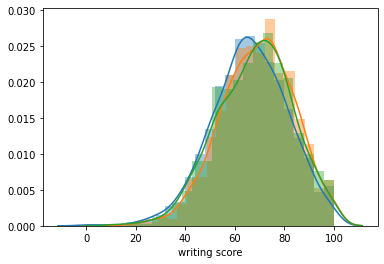

In [9]:
sns.distplot(x['math score'])
sns.distplot(x['reading score'])
sns.distplot(x['writing score'])
#linear regression

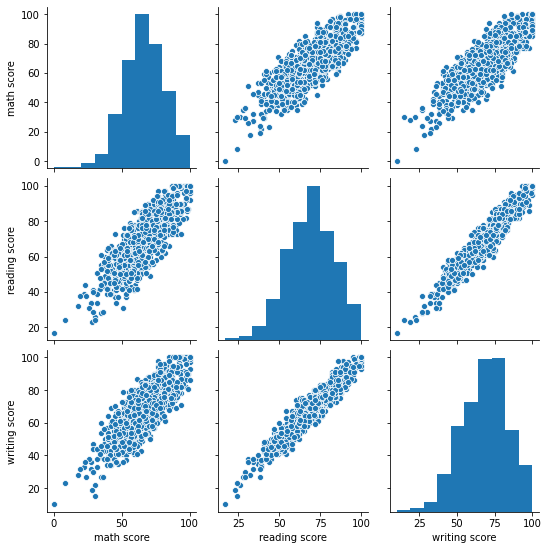

In [10]:
sns.pairplot(x)

In [11]:
#probability of students scoring above 50 in Maths
t_students=x.shape[0]
score_abv_50=x[x['math score'] > 50 ].shape[0]
probability_maths=(score_abv_50/t_students)*100
probability_maths

85.0

In [12]:
#probability of students scoring above 50 in Reading
t_students=x.shape[0]
score_abv_50=x[x['reading score'] > 50 ].shape[0]
probability_read=(score_abv_50/t_students)*100
probability_read

90.3

In [13]:
#probability of students scoring above 50 in Writing
t_students=x.shape[0]
score_abv_50=x[x['writing score'] > 50 ].shape[0]
probability_write=(score_abv_50/t_students)*100
probability_write

87.6

In [14]:
x.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [15]:
x['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
#effect of lunch
x[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [17]:
#effect of test preparation course
x[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

In [18]:
#effect of race
x[['race/ethnicity','gender','math score','writing score','reading score']].groupby(['race/ethnicity','gender']).agg('median')

math score  writing score  reading score
race/ethnicity gender                                          
group A        female        57.0           67.0           67.5
               male          63.0           60.0           61.0
group B        female        62.0           71.5           71.5
               male          65.0           60.0           62.0
group C        female        63.0           74.0           73.0
               male          68.0           62.0           66.0
group D        female        65.0           76.0           74.0
               male          71.0           67.0           68.0
group E        female        71.0           76.0           76.0
               male          78.0           70.0           73.0

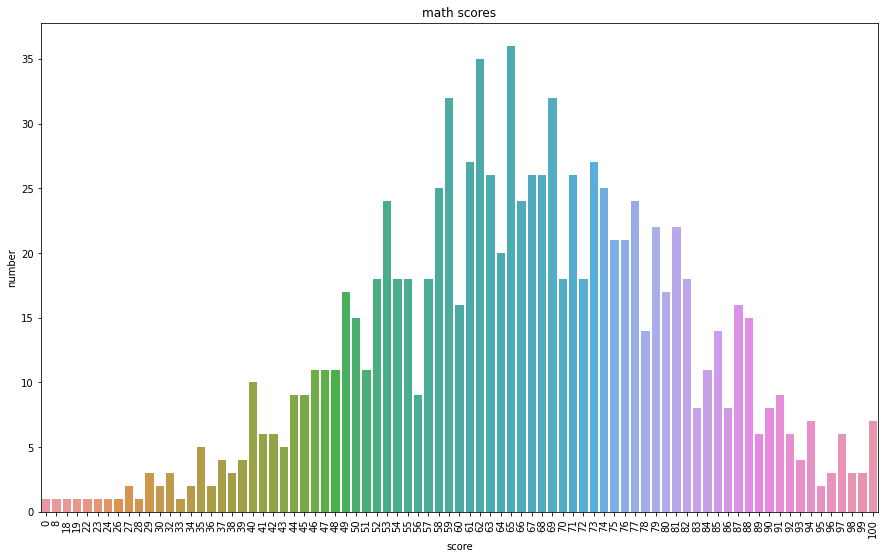

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x['math score'])
plt.title('math scores')
plt.xlabel('score')
plt.ylabel('number')
plt.xticks(rotation = 90)
plt.show()

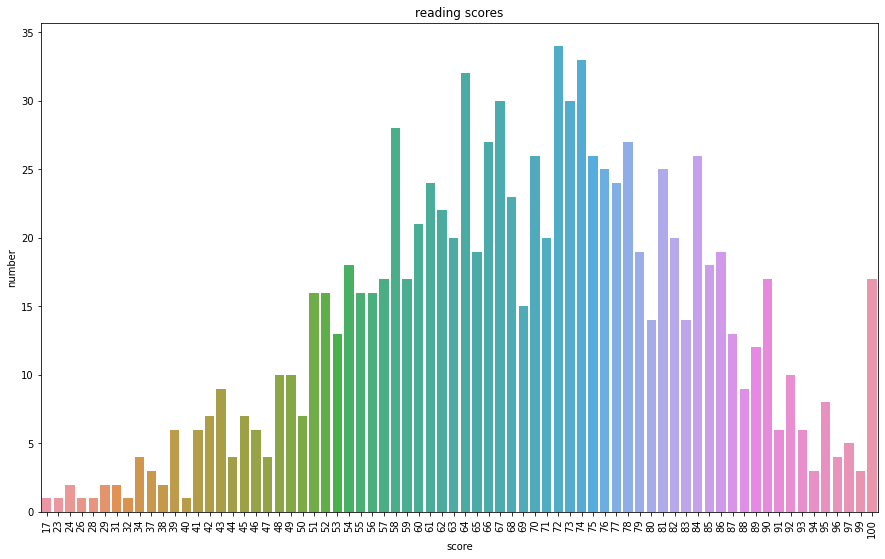

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x['reading score'])
plt.title('reading scores')
plt.xlabel('score')
plt.ylabel('number')
plt.xticks(rotation = 90)
plt.show()

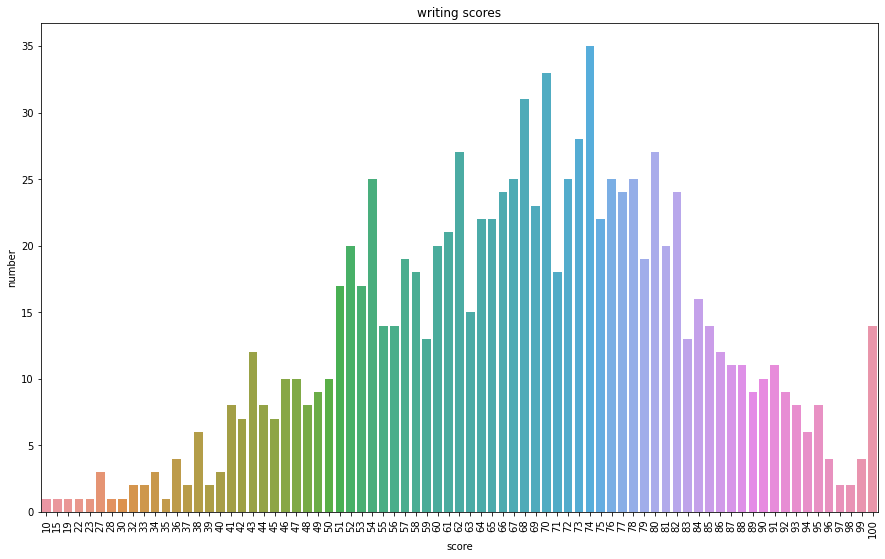

In [26]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x['writing score'])
plt.title('writing scores')
plt.xlabel('score')
plt.ylabel('number')
plt.xticks(rotation = 90)
plt.show()

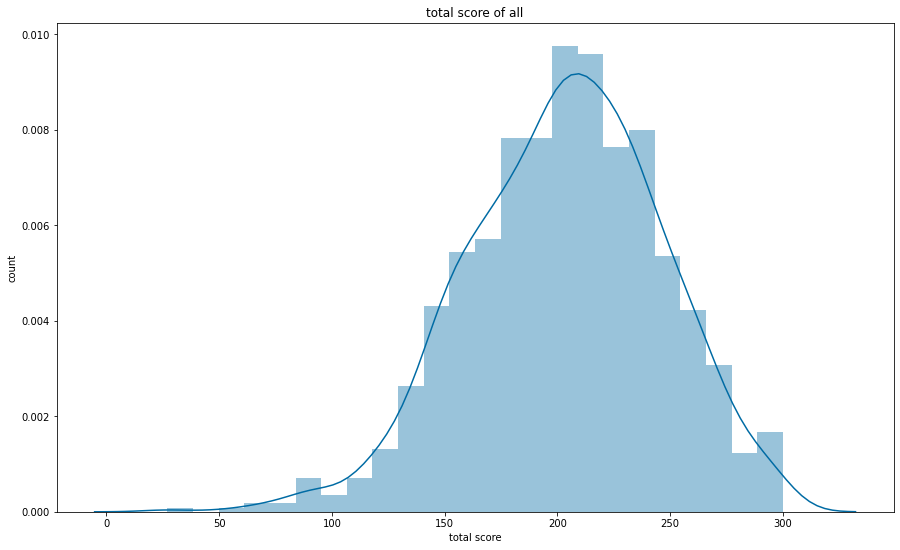

In [28]:
x['total']=x['math score']+x['reading score']+x['writing score']
sns.distplot(x['total'])
plt.title('total score of all')
plt.xlabel('total score')
plt.ylabel('count')
plt.show()